In [29]:
import math
import numpy as np
import re
import string
import cv2
import os
import errno

from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image

# You will need to update this path to match the folder in your Google Drive
PATH = "./pictures"
croppedPath = "./cropped"
# labels = !ls "{PATH}"




x0 = 50
y0 = 80
spaceX = 5
spaceFlagX = 105
dy = 170
dx = 95
x1 = x0 + spaceX + dx
x2 = x1 + spaceFlagX + dx
x3 = x2 + spaceX + dx
x4 = x3 + spaceX + dx
n = 0

for file in os.listdir(PATH):
    if(file.endswith('.png')):
        cropPath = []
        for i in range(4):
            cropPath.append(file[6+i])
            folderName = croppedPath +'/cropped'+ cropPath[i]
            if not os.path.exists(folderName):
                    os.makedirs(folderName)
        image = cv2.imread(PATH + '/' + file) #converts to grey scale
        crop_img1 = image[y0:y0+dy, x0:x0+dx]
        #crop_img1 = np.expand_dims(crop_img1, axis=2)
        crop_img2 = image [y0:y0+dy, x1:x1+dx]
        #crop_img2 = np.expand_dims(crop_img2, axis=2)
        crop_img3 = image [y0:y0+dy, x2:x2+dx]
        #crop_img3 = np.expand_dims(crop_img3, axis=2)
        crop_img4 = image [y0:y0+dy, x3:x3+dx]
        #crop_img4 = np.expand_dims(crop_img4, axis=2)
        cv2.imwrite(croppedPath +'/cropped' + cropPath[0]+ '/' + cropPath[0] + str(n) + '.png',crop_img1)
        cv2.imwrite(croppedPath +'/cropped' + cropPath[1]+ '/' + cropPath[1] + str(n) + '.png',crop_img2)
        cv2.imwrite(croppedPath +'/cropped' + cropPath[2]+ '/' + cropPath[2] + str(n) + '.png',crop_img3)
        cv2.imwrite(croppedPath +'/cropped' + cropPath[3]+ '/' + cropPath[3] + str(n) + '.png',crop_img4)
        n = n+1
        
#plt.imshow(crop_img4)

In [3]:
#create dictionary

labels = ['0','1','2','3','4','5','6','7','8','9']
labels.extend(list(string.ascii_uppercase))
dictionary = {"image" : [] , "vector": []}

for folder in os.listdir(croppedPath):
    pathToImage = croppedPath + '/' + str(folder)
    for file in os.listdir(pathToImage):
        label = file[0]
        #creating the vector
        vec = [0] * 36
        index = labels.index(label)
        vec[index] = 1
        img = cv2.imread(pathToImage + '/' + file)
        # img = np.expand_dims(img,axis=2)
        dictionary["image"].append(img)#/255.0) #?
        dictionary["vector"].append(vec)

In [46]:
dictionary["image"][0]

array([[[225, 221, 220],
        [226, 222, 221],
        [227, 223, 222],
        ...,
        [225, 221, 220],
        [226, 222, 221],
        [226, 222, 221]],

       [[226, 222, 221],
        [227, 223, 222],
        [228, 224, 223],
        ...,
        [227, 223, 222],
        [228, 224, 223],
        [227, 223, 222]],

       [[223, 221, 220],
        [224, 222, 221],
        [226, 224, 223],
        ...,
        [226, 222, 221],
        [226, 222, 221],
        [225, 221, 220]],

       ...,

       [[223, 219, 218],
        [224, 220, 219],
        [223, 219, 218],
        ...,
        [220, 216, 215],
        [220, 216, 215],
        [220, 216, 215]],

       [[221, 217, 216],
        [223, 219, 218],
        [222, 218, 217],
        ...,
        [220, 216, 215],
        [220, 216, 215],
        [221, 217, 216]],

       [[220, 216, 215],
        [222, 218, 217],
        [221, 217, 216],
        ...,
        [221, 217, 216],
        [221, 217, 216],
        [221, 217, 216]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


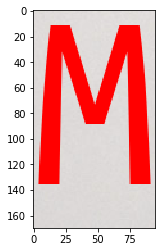

In [56]:
INDEX=32

plt.imshow(dictionary["image"][INDEX])
print(dictionary["vector"][INDEX])

In [30]:
# # train the system

from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend

In [5]:
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [31]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(dy,dx, 3)))
conv_model.add(layers.MaxPooling2D((2, 2)))
#conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#conv_model.add(layers.MaxPooling2D((2, 2)))
#conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))     

conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 168, 93, 32)       896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 46, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 82, 44, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 22, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115456)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 115456)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [32]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [51]:
reset_weights(conv_model)
history_conv = conv_model.fit(np.array(dictionary["image"]), np.array(dictionary["vector"]), 
                              validation_data = (np.array(dictionary["image"]), np.array(dictionary["vector"])), 
                              epochs=20, 
                              batch_size=8)

Train on 213 samples, validate on 213 samples
Epoch 1/20
213/213 [==============================] - 21s 101ms/step - loss: 387.0378 - acc: 0.1174 - val_loss: 60.7415 - val_acc: 0.4554
Epoch 2/20
213/213 [==============================] - 22s 103ms/step - loss: 27.4653 - acc: 0.5962 - val_loss: 9.9772 - val_acc: 0.7559
Epoch 3/20
213/213 [==============================] - 22s 101ms/step - loss: 5.3108 - acc: 0.8592 - val_loss: 6.6148 - val_acc: 0.8310
Epoch 4/20
213/213 [==============================] - 22s 102ms/step - loss: 1.9576 - acc: 0.9061 - val_loss: 1.4320 - val_acc: 0.9390
Epoch 5/20
213/213 [==============================] - 22s 102ms/step - loss: 1.0424 - acc: 0.9577 - val_loss: 0.1723 - val_acc: 0.9953
Epoch 6/20
213/213 [==============================] - 22s 102ms/step - loss: 0.3528 - acc: 0.9906 - val_loss: 0.0151 - val_acc: 0.9953
Epoch 7/20
213/213 [==============================] - 22s 102ms/step - loss: 0.2195 - acc: 0.9906 - val_loss: 1.6902e-07 - val_acc: 1.0000
E

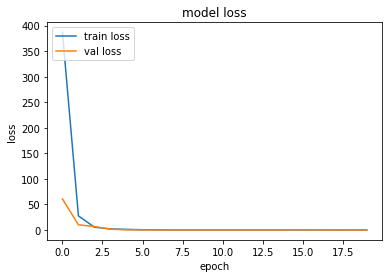

In [52]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [ ]:

# # Display images in the training data set. 
# def displayImage(index):
#   img = X_dataset[index]
  
#   img_aug = np.expand_dims(img, axis=0)
#   y_predict = conv_model.predict(img_aug)[0]
  
#   plt.imshow(img)  
#   caption = ("                  Label\n"+
#              "GND truth: {:.2} \nPredicted: {:.2}".
#              format(dictionary["image"][index], Y_dataset["image"][index], y_predict[0]))
#   plt.text(0.5, 0.5, caption, 
#            color='orange', fontsize = 16,
#            horizontalalignment='left', verticalalignment='bottom')


# interact(displayImage, 
#         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
#                                    step=1, value=10))
confusion = []
for i in range(0,len(dictionary["image"])-1):
    img_aug = np.expand_dims(dictionary["image"][i], axis=0)
    y_predict = conv_model.predict(img_aug)
    confusion.append(abs(y_predict - dictionary["vector"][i]))




In [44]:
# len(dictionary["vector"])
confusion



[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.71999944e-38, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 7.59519014e-38, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000